In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import scipy.stats as stats
import pymc as pm
import arviz as az

In [3]:
df_train = pd.read_csv('regression/train_reg.csv')
df_test = pd.read_csv('regression/test_reg.csv')

In [4]:
X_train = df_train[['x']]
y_train = df_train[['y']]
X_test = df_test[['x']]


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
with pm.Model() as model:

    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=2)
    epsilon = pm.HalfNormal('epsilon', 10)


    mu = pm.Deterministic('mu', alpha + beta * X_train)


    y_observed = pm.Normal('y_observed', mu=mu, sigma=epsilon, observed=y_train)

    trace = pm.sample(1000, tune=2000)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 3 chains for 2_000 tune and 1_000 draw iterations (6_000 + 3_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


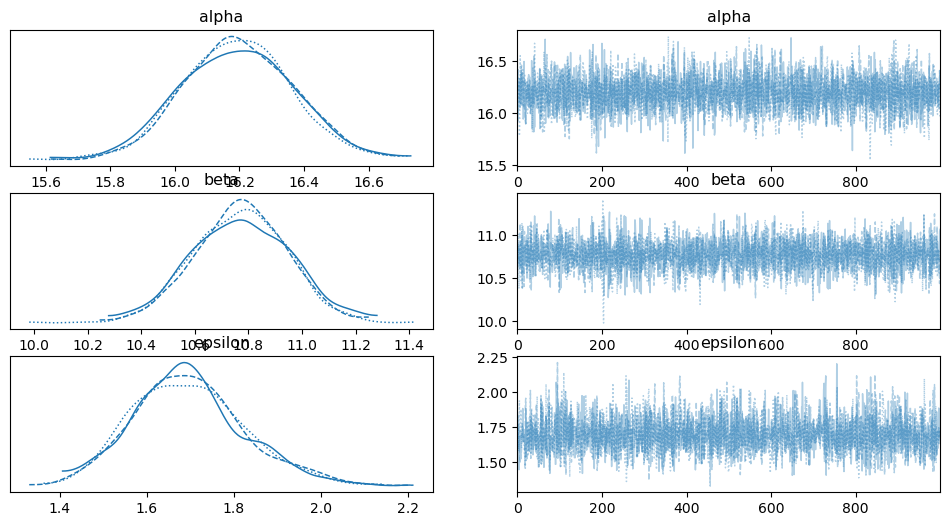

In [6]:
az.plot_trace(trace, var_names=['alpha', 'beta', 'epsilon']);

Total samples:  3000


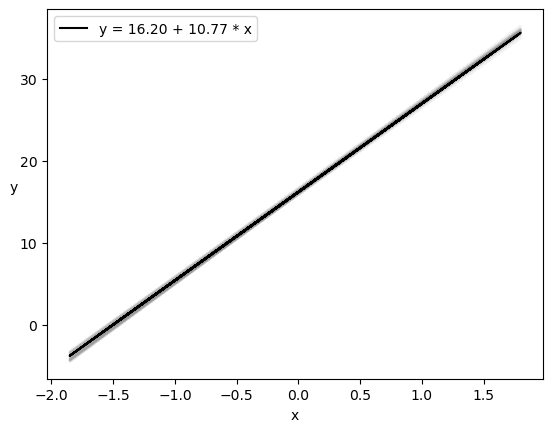

In [7]:

extracted_samples = az.extract(trace)

mean_alpha = extracted_samples['alpha'].mean().item()
mean_beta = extracted_samples['beta'].mean().item()


print("Total samples: ", extracted_samples.sample.size)


sample_indices = range(0, extracted_samples.sample.size, 100)


plt.plot(X_train, extracted_samples['alpha'][sample_indices].values + extracted_samples['beta'][sample_indices].values * X_train, c='gray', alpha=0.1)


plt.plot(X_train, mean_alpha + mean_beta * X_train, c='k',
         label=f'y = {mean_alpha:.2f} + {mean_beta:.2f} * x')


plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()


In [8]:

train_predictions = [mean_alpha + mean_beta * x for x in X_train]
r2_train = r2_score(y_train, train_predictions)
print("R^2 Score (Training Set):", r2_train)


test_predictions = [mean_alpha + mean_beta * x for x in X_test]
reshaped_test_predictions = np.array(test_predictions).reshape(100)


print("Reshaped Test Predictions:")
print(reshaped_test_predictions)


R^2 Score (Training Set): 0.9772014854882101
Reshaped Test Predictions:
[17.52156379  7.54566856 -2.64002626 29.70910413 21.53699806 22.0979764
 12.90027422 25.37719792 28.09807132  5.64338153  6.33824481 28.4367945
 21.75992132  9.77117305 28.40356854 30.28653878 17.75046904 24.37884658
 17.49765197  5.16635356 24.70015575  7.38379602 24.16748082 21.07063121
 10.67787118  7.9568049  14.02563485 13.99423062 21.65291985 24.08266028
  1.97763102  1.4318131   8.49366869 11.39896318 21.24296993 21.14723863
 21.65840369 20.71677304 28.69915127  6.55490669  7.76711819 38.51419081
  8.39008256  1.26015653 20.75105239 33.74574711  2.60220311  1.40730186
 25.33323363 15.53709648 17.78472864 25.15623064 -0.92370892 21.17238341
 11.05821216 12.13404423 20.38672214 18.27696435 29.51838822 14.44854504
 28.15640579 17.10763975  2.8342825   1.91376432  6.65656645 13.52463631
  4.27710402 34.20953497 15.59231618 22.8897393   7.60548907 19.64400408
 28.31770533  7.14745206 11.4765003  20.50448835  8.63

In [10]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, reshaped_test_predictions)

2.3844660271344362